1. What is in your data?
We are using the dataset found at https://www.kaggle.com/datasets/nayanack/movies-and-directors-dataset-for-film-analytics. It contains two datasets, one which has data on movies and one which has data on directors. The directors dataset has an ID which acts as a foreign key into the movies dataset, as well as their gender. The movies dataset has columns for budget, popularity, revenue, title, vote statistics, the ID of the director, and the year/month/day of release.

3. How will these data be useful for studying the phenomenon you're interested in?
We want to analyze what makes a movie successful, whether that is in terms of box office revenue, or awards such as the Oscars, Emmys, etc. We can use this data as a baseline for seeing which films were successful, when it came out, and who directed it. Some super simple stuff to look at could be things like budget to revenue ratio.

5. What are the challenges you've resolved or expect to face in using them?
Finding additional data to make more inferences into what specifically about these films made them more or less likely to be successful at the box office, or in award shows. We may need to utilize some APIs or additional data sets to better understand why certain movies were more successful.


Our dataset is clean. Below are some simple graphs showing some general .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("movies.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1465 non-null   int64  
 1   id            1465 non-null   int64  
 2   budget        1465 non-null   int64  
 3   popularity    1465 non-null   int64  
 4   revenue       1465 non-null   int64  
 5   title         1465 non-null   object 
 6   vote_average  1465 non-null   float64
 7   vote_count    1465 non-null   int64  
 8   director_id   1465 non-null   int64  
 9   year          1465 non-null   int64  
 10  month         1465 non-null   object 
 11  day           1465 non-null   object 
dtypes: float64(1), int64(8), object(3)
memory usage: 137.5+ KB


In [21]:
df.value_counts('month')

month
Dec    193
Sep    166
Oct    149
Jun    133
Jul    127
Nov    117
May    116
Aug    111
Feb    104
Mar     99
Apr     90
Jan     60
Name: count, dtype: int64

In [22]:
df.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


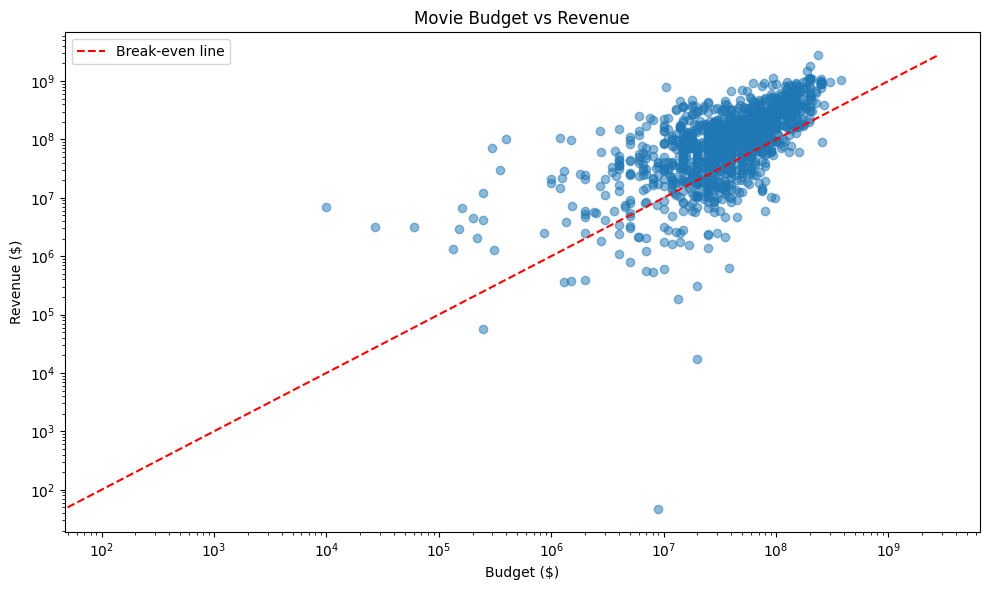

In [23]:
# Scatter plot of movies budget to revenue, with a break-even line showing how films typically performed.
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)

plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Movie Budget vs Revenue')

max_value = max(df['budget'].max(), df['revenue'].max())
plt.plot([0, max_value], [0, max_value], 'r--', label='Break-even line')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.tight_layout()
plt.show()

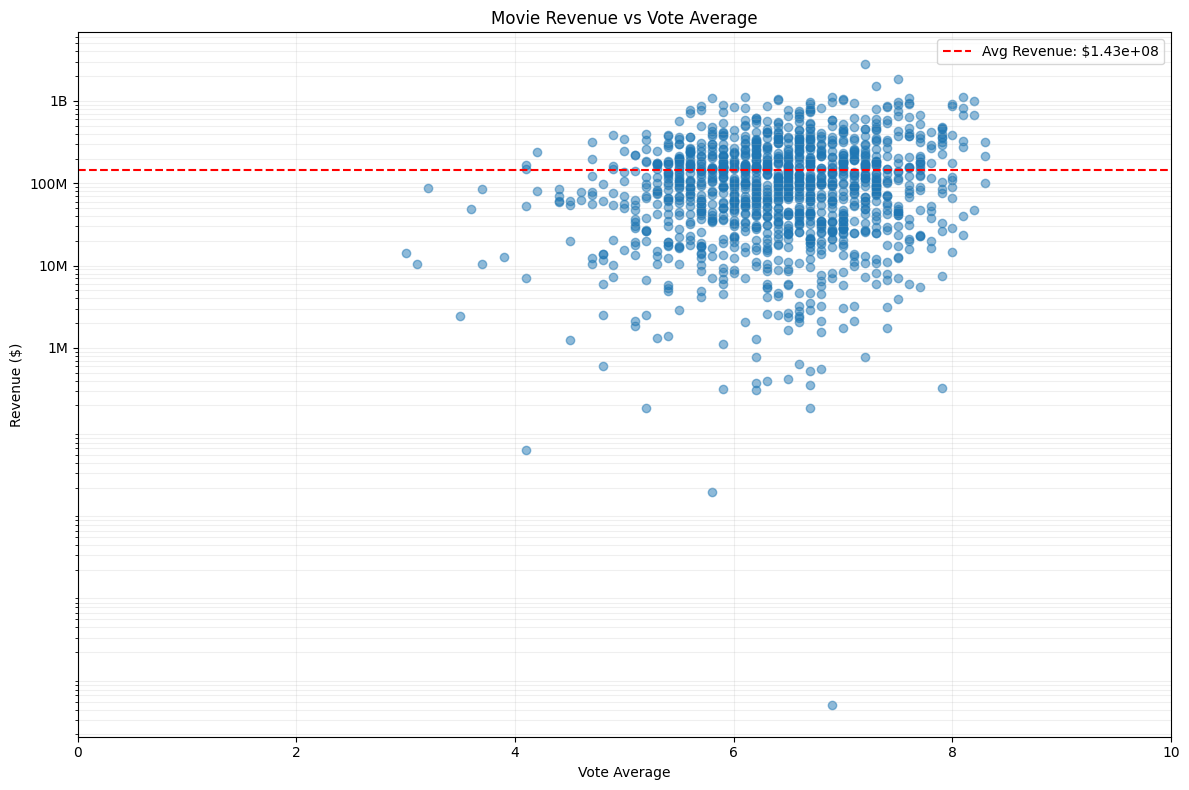

In [26]:
# A scatter plot to see how revenue compares to overall rating, in other words, do movies which gross the highest also receive high praise?
plt.figure(figsize=(12, 8))
plt.scatter(df['vote_average'], df['revenue'], alpha=0.5)

plt.xlabel('Vote Average')
plt.ylabel('Revenue ($)')
plt.title('Movie Revenue vs Vote Average')

plt.yscale('log')
plt.xlim(0, 10)
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.yticks([1e6, 1e7, 1e8, 1e9], ['1M', '10M', '100M', '1B'])

avg_revenue = df['revenue'].mean()
plt.axhline(y=avg_revenue, color='r', linestyle='--', label=f'Avg Revenue: ${avg_revenue:.2e}')

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("directors.csv")

In [ ]:
df.info()